## Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import svm, datasets
from tensorflow.python.framework import ops
from tensorflow.keras import initializers
from keras_visualizer import visualizer
from IPython.display import Image
ops.reset_default_graph()

from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.models import Sequential 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from keras.layers import LSTM

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Reading the dataset

In [ ]:
data_df = pd.read_csv("drive/MyDrive/Capstone/data_to_use.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28,30,34,36,40,42,44,46,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_df.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,Month,Year,...,WasteTypeID,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable
0,0,7958.0,30.0,18.0,Oficina,18.0,Consumo toner,2017-01-01,1.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,1,7959.0,30.0,18.0,Oficina,18.0,Consumo toner,2017-02-01,2.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,2,7960.0,30.0,18.0,Oficina,18.0,Consumo toner,2017-03-01,3.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,3,7961.0,30.0,18.0,Oficina,18.0,Consumo toner,2017-04-01,4.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,4,7962.0,30.0,18.0,Oficina,18.0,Consumo toner,2017-05-01,5.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [ ]:
data.shape

## Encoding the dataset

In [ ]:
columns_to_encode = ['OrganizationalUnitTypeDescription','SourceDescription','PeriodDescription','AspectGroupDescription',
'FactorDescription','AspectDescription','UnitDescription','GEIDescription','EmitterGEIDescription','VendorName',
'ScopeDescription','BiogenicEmission']

In [ ]:
data_df['ScopeDescription'].astype("category").cat.codes

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
514157    1
514158   -1
514159    1
514160    1
514161   -1
Length: 514162, dtype: int8

In [ ]:
for column in columns_to_encode:
  data_df[column] = data_df[column].astype("category").cat.codes

In [ ]:
data_df.dtypes

Unnamed: 0                             int64
Id                                   float64
ClientID                             float64
OrganizationalUnitID                 float64
OrganizationalUnitTypeDescription       int8
SourceID                             float64
SourceDescription                      int16
ValueDate                             object
Month                                float64
Year                                 float64
PeriodID                             float64
PeriodDescription                       int8
AspectGroupID                        float64
AspectGroupDescription                  int8
FactorID                             float64
FactorDescription                       int8
AspectID                             float64
AspectDescription                      int16
new_value                            float64
UnitID                               float64
UnitDescription                         int8
GEIID                                float64
GEIDescrip

In [ ]:
data_df.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,Month,Year,...,WasteTypeID,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable
0,0,7958.0,30.0,18.0,18,18.0,3487,2017-01-01,1.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
1,1,7959.0,30.0,18.0,18,18.0,3487,2017-02-01,2.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
2,2,7960.0,30.0,18.0,18,18.0,3487,2017-03-01,3.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
3,3,7961.0,30.0,18.0,18,18.0,3487,2017-04-01,4.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
4,4,7962.0,30.0,18.0,18,18.0,3487,2017-05-01,5.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False


## Sorting thd dataset per CleintID, OrganizationalUnitID, Year, Month

In [ ]:
# Sort values per Client with Year and month.
sorted_data_df = data_df.sort_values(by=["ClientID",'OrganizationalUnitID','Year','Month'])

In [ ]:
sorted_data_df.head()

,Unnamed: 0,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceID,SourceDescription,ValueDate,Month,Year,...,WasteTypeID,WasteTypeDescription,WasteTreatmentID,WasteTreatmentDescription,TransportID,TransportDescription,TransportTypeID,TransportTypeDescription,BiogenicEmission,Renovable
24625,24685,258036.0,30.0,16.0,13,NaN,-1,2020-01-01,1.0,2020.0,...,NaN,NaN,NaN,NaN,4.0,Tren RENFE AVE,2.0,Rail,0,NaN
24626,24686,258037.0,30.0,16.0,13,NaN,-1,2020-01-01,1.0,2020.0,...,NaN,NaN,NaN,NaN,4.0,Tren RENFE AVE,2.0,Rail,0,NaN
24629,24689,258044.0,30.0,16.0,13,NaN,-1,2020-01-01,1.0,2020.0,...,NaN,NaN,NaN,NaN,26.0,Tren RENFE larga distancia,2.0,Rail,0,NaN
24630,24690,258045.0,30.0,16.0,13,NaN,-1,2020-01-01,1.0,2020.0,...,NaN,NaN,NaN,NaN,26.0,Tren RENFE larga distancia,2.0,Rail,0,NaN
24633,24693,258050.0,30.0,16.0,13,NaN,-1,2020-01-01,1.0,2020.0,...,NaN,NaN,NaN,NaN,18.0,Coche diesel mediano(1.7l-2.0l),3.0,Carretera,0,NaN


In [ ]:
clients = sorted_data_df['ClientID'].values.ravel()
clients = sorted(pd.unique(clients))

In [ ]:
new_data_groupby = sorted_data_df.groupby(['ClientID','Month']).agg({'new_value':'sum'}).reset_index().sort_values(by=['ClientID','Month'])

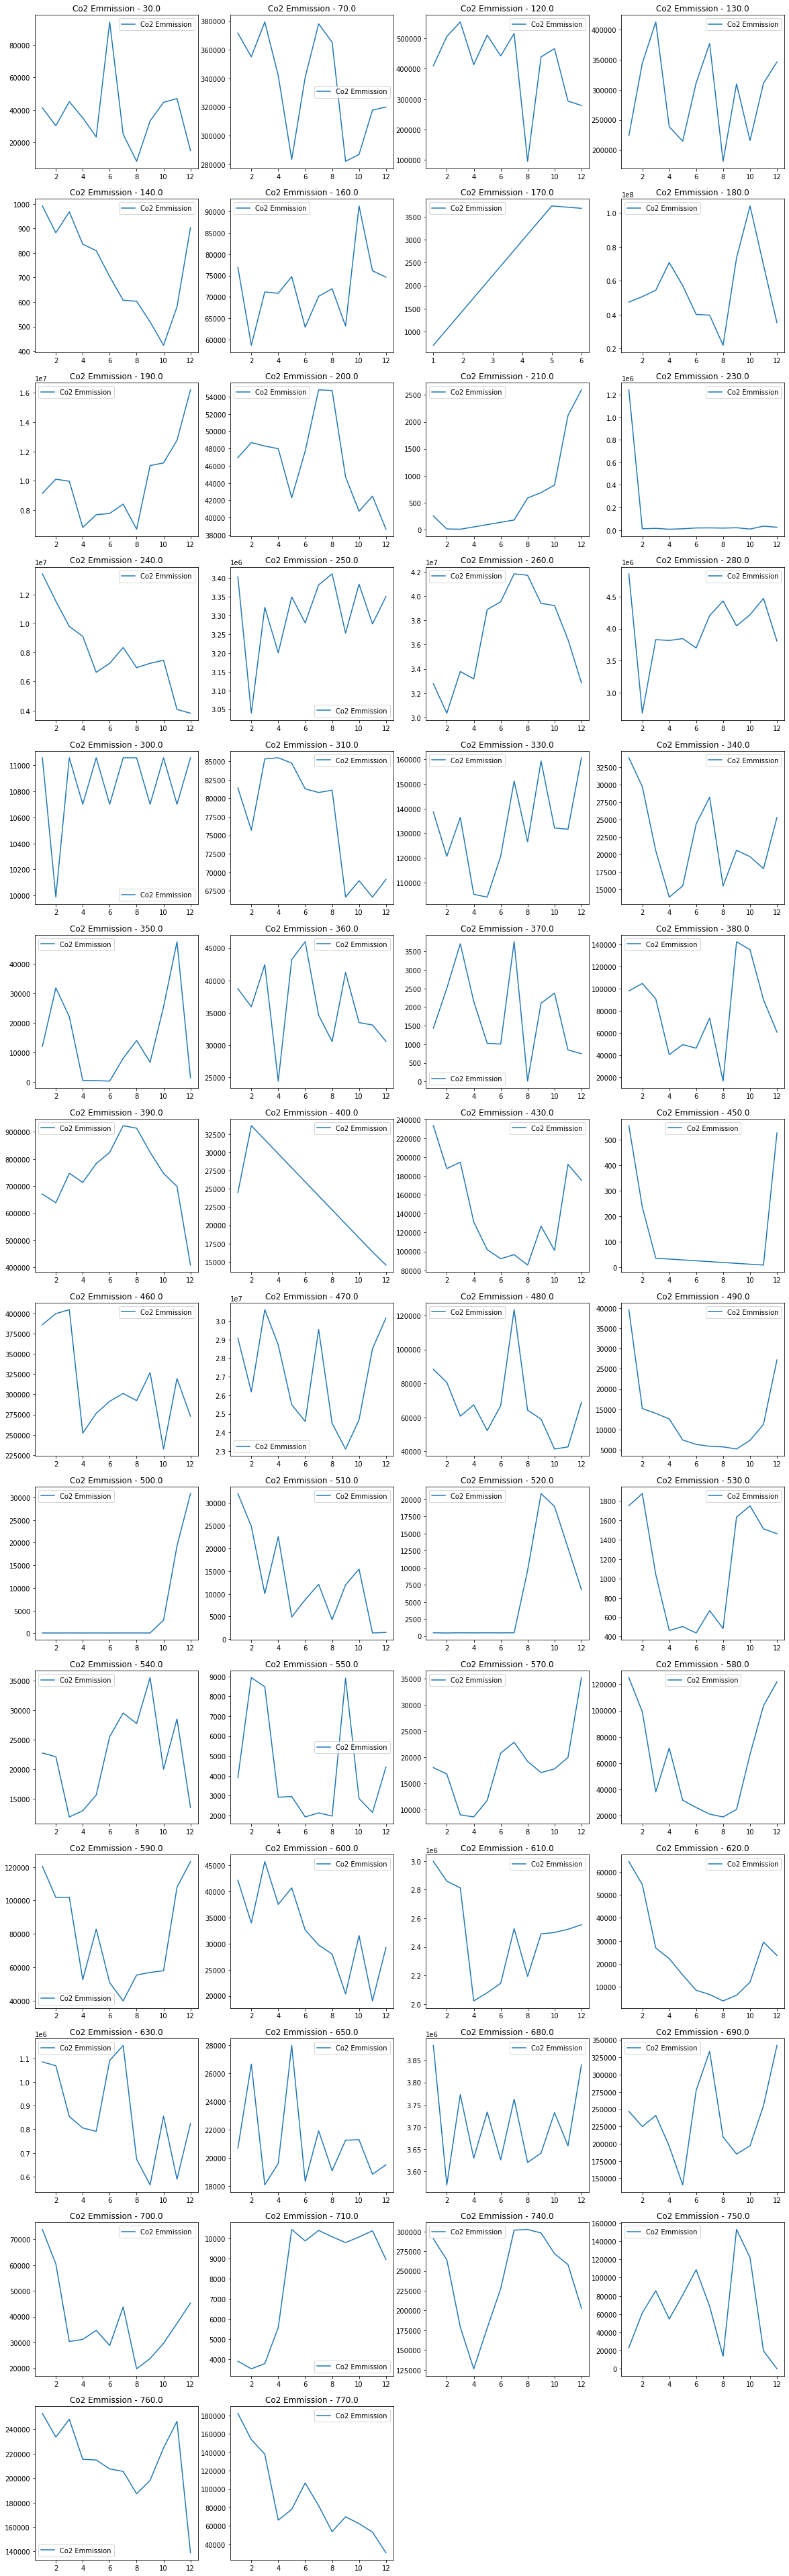

In [ ]:
#get the evolution of offset exp through time
plt.figure(figsize=(20,100))

for i,client in zip(range(1,55),clients):
    plt.subplot(20, 4, i)
    plt.plot(new_data_groupby.loc[new_data_groupby['ClientID'] == client]['Month'],
             new_data_groupby.loc[new_data_groupby['ClientID'] == client]['new_value'], label='Co2 Emmission')
    plt.title(f'Co2 Emmission - {client}')
    plt.legend()
    
plt.show()

## Analyzing the target feature

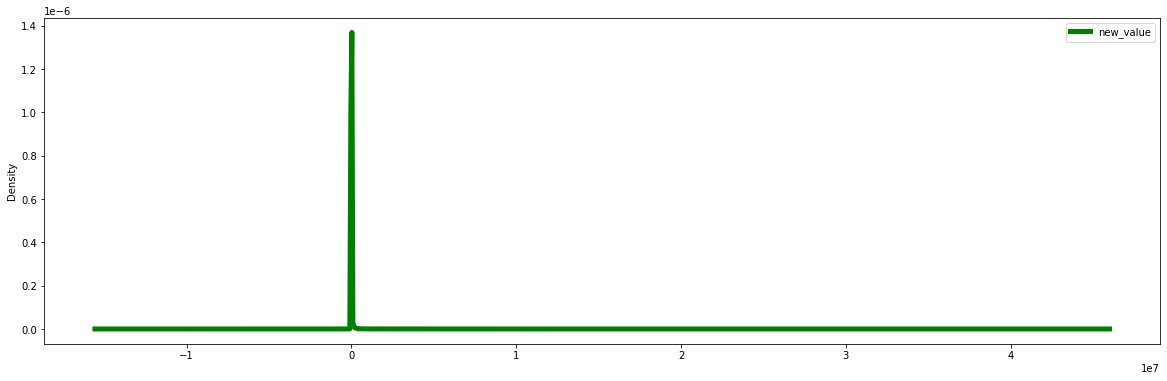

In [ ]:
#normal=(np.random.normal(size = vis.shape[0], scale = 1))
sorted_data_df["new_value"].plot.kde(figsize=(20,6), linewidth = 5, color = "green")
#pd.Series(normal).plot.kde(linewidth = 5, label = "normal", linestyle = "--", color = "k", alpha = 0.2)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


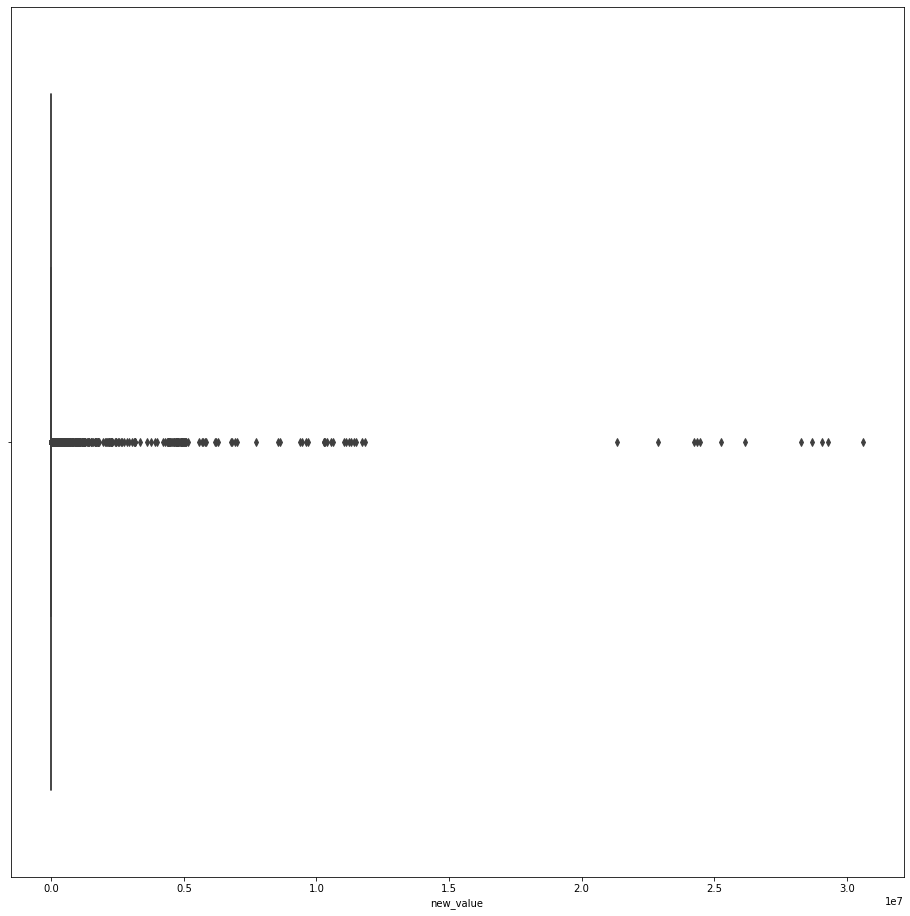

In [ ]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.boxplot(sorted_data_df["new_value"])

In [ ]:
sorted_data_df["new_value"].loc[sorted_data_df["new_value"]<0].count()

0

In [ ]:
sorted_data_df.loc[sorted_data_df["new_value"]<0].head()

,Unnamed: 0,Unnamed: 0.1,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,...,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6


In [ ]:
Negative_emissions = sorted_data_df.loc[sorted_data_df["new_value"]<0]

In [ ]:
sorted_data_df.loc[sorted_data_df["new_value"]==0].count()

Unnamed: 0                           0
Unnamed: 0.1                         0
Id                                   0
ClientID                             0
OrganizationalUnitID                 0
OrganizationalUnitTypeDescription    0
SourceDescription                    0
Month                                0
Year                                 0
PeriodDescription                    0
AspectGroupDescription               0
FactorDescription                    0
AspectDescription                    0
UnitDescription                      0
GEIDescription                       0
EmitterGEIDescription                0
VendorName                           0
ScopeDescription                     0
BiogenicEmission                     0
new_value                            0
overall_sum                          0
overall_mean                         0
sum_lag_1                            0
sum_lag_2                            0
sum_lag_4                            0
sum_lag_6                

In [ ]:
Zero_Emissions = sorted_data_df.loc[sorted_data_df["new_value"]==0]

In [ ]:
sorted_data_df.shape

(500997, 30)

In [ ]:
sorted_data_df =  sorted_data_df.loc[sorted_data_df["new_value"]>0]

In [ ]:
sorted_data_df.shape

(500997, 30)

In [ ]:
quantiles = [0,0.25,0.5,0.75,0.9]
for quantile in quantiles:
  print(sorted_data_df["new_value"].quantile(q=quantile))
  
print(sorted_data_df["new_value"].max())
print(sorted_data_df["new_value"].min())
print(sorted_data_df["new_value"].mean())

5.6e-11
0.109
0.49
8.94
53.32
30609768.0
5.6e-11
2657.9448549069893


In [ ]:
round(sorted_data_df["new_value"].quantile(q=0.9) - sorted_data_df["new_value"].quantile(q=0.0),2)

53.32

## Creating new Features from new value

In [ ]:
sorted_data_df.groupby(['ClientID','OrganizationalUnitID','Year','Month']).sum().reset_index()

,ClientID,OrganizationalUnitID,Year,Month,Unnamed: 0,Unnamed: 0.1,Id,OrganizationalUnitTypeDescription,SourceDescription,PeriodDescription,...,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
0,30.0,16.0,2020.0,1.0,28,197528,2064376.0,104.0,27760.0,56.0,...,42558.489605,5319.811201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,30.0,16.0,2020.0,2.0,38,98750,1032162.0,52.0,13880.0,28.0,...,21061.367806,5265.341952,21279.244803,0.000000,0.000000,0.000000,2659.905600,0.000000,0.000000,0.000000
2,30.0,16.0,2020.0,3.0,25,49375,516085.0,26.0,6940.0,14.0,...,2492.077950,1246.038975,10530.683903,10639.622401,0.000000,0.000000,2632.670976,1329.952800,0.000000,0.000000
3,30.0,18.0,2017.0,1.0,45,25,26329.0,54.0,10359.0,12.0,...,6.090929,2.030310,3738.116925,15796.025855,0.000000,0.000000,1869.058462,3949.006464,0.000000,0.000000
4,30.0,18.0,2017.0,2.0,54,30,26334.0,54.0,10359.0,12.0,...,5.502549,1.834183,6.090929,3738.116925,15959.433602,0.000000,2.030310,1869.058462,1994.929200,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,780.0,1652.0,2021.0,8.0,4507929,3813147,12914145.0,162.0,25434.0,72.0,...,187762.935600,20862.548400,194153.752800,84633.840000,69747.306904,12655.785922,12943.583520,28211.280000,1937.425192,703.099218
9462,780.0,1652.0,2021.0,9.0,16529766,13986894,47359830.0,594.0,92484.0,264.0,...,568854.760320,17238.023040,688464.097200,711897.093600,171738.611269,5595.514233,76496.010800,47459.806240,8178.029108,310.861902
9463,780.0,1652.0,2021.0,10.0,13525164,11430171,38706327.0,486.0,76302.0,216.0,...,340362.010368,12606.000384,465426.622080,563288.806800,253901.520000,209241.920713,14103.837033,62587.645200,84633.840000,5812.275575
9464,780.0,1652.0,2021.0,11.0,19537635,16503339,55878375.0,702.0,110214.0,312.0,...,288842.240700,7406.211300,491634.014976,672282.898560,841332.928800,202963.813319,18208.667221,20372.209047,56088.861920,9664.943491


In [ ]:
new_df = sorted_data_df.groupby(['ClientID','OrganizationalUnitID','Year','Month']).agg({'new_value':['sum','mean']}).reset_index()[['ClientID','OrganizationalUnitID','Year','Month','new_value']]

In [ ]:
new_df.columns = ['ClientID','OrganizationalUnitID','Year','Month','overall_sum','overall_mean']

In [ ]:
new_df.columns

Index(['ClientID', 'OrganizationalUnitID', 'Year', 'Month', 'overall_sum',
       'overall_mean'],
      dtype='object')

In [ ]:
#new_df.rename(columns={"new_value":"overall_value"},inplace=True)

In [ ]:
new_df.head()

,ClientID,OrganizationalUnitID,Year,Month,overall_sum,overall_mean
0,30.0,16.0,2020.0,1.0,5319.811201,664.976400
1,30.0,16.0,2020.0,2.0,5265.341952,1316.335488
2,30.0,16.0,2020.0,3.0,1246.038975,623.019487
3,30.0,18.0,2017.0,1.0,2.030310,0.676770
4,30.0,18.0,2017.0,2.0,1.834183,0.611394


In [ ]:
new_df['sum_lag_1'] = new_df['overall_sum'].shift(1).fillna(0)
new_df['sum_lag_2'] = new_df['overall_sum'].shift(2).fillna(0)
new_df['sum_lag_4'] = new_df['overall_sum'].shift(4).fillna(0)
new_df['sum_lag_6'] = new_df['overall_sum'].shift(6).fillna(0)

new_df['mean_lag_1'] = new_df['overall_mean'].shift(1).fillna(0)
new_df['mean_lag_2'] = new_df['overall_mean'].shift(2).fillna(0)
new_df['mean_lag_4'] = new_df['overall_mean'].shift(4).fillna(0)
new_df['mean_lag_6'] = new_df['overall_mean'].shift(6).fillna(0)

In [ ]:
new_df

,ClientID,OrganizationalUnitID,Year,Month,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
0,30.0,16.0,2020.0,1.0,5319.811201,664.976400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,30.0,16.0,2020.0,2.0,5265.341952,1316.335488,5319.811201,0.000000,0.000000,0.000000,664.976400,0.000000,0.000000,0.000000
2,30.0,16.0,2020.0,3.0,1246.038975,623.019487,5265.341952,5319.811201,0.000000,0.000000,1316.335488,664.976400,0.000000,0.000000
3,30.0,18.0,2017.0,1.0,2.030310,0.676770,1246.038975,5265.341952,0.000000,0.000000,623.019487,1316.335488,0.000000,0.000000
4,30.0,18.0,2017.0,2.0,1.834183,0.611394,2.030310,1246.038975,5319.811201,0.000000,0.676770,623.019487,664.976400,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,780.0,1652.0,2021.0,8.0,20862.548400,2318.060933,21572.639200,9403.760000,7749.700767,1406.198436,1438.175947,3134.586667,215.269466,78.122135
9462,780.0,1652.0,2021.0,9.0,17238.023040,522.364335,20862.548400,21572.639200,5204.200341,169.561037,2318.060933,1438.175947,247.819064,9.420058
9463,780.0,1652.0,2021.0,10.0,12606.000384,466.888903,17238.023040,20862.548400,9403.760000,7749.700767,522.364335,2318.060933,3134.586667,215.269466
9464,780.0,1652.0,2021.0,11.0,7406.211300,189.902854,12606.000384,17238.023040,21572.639200,5204.200341,466.888903,522.364335,1438.175947,247.819064


In [ ]:
new_data = pd.merge(sorted_data_df, new_df, on=['ClientID','OrganizationalUnitID','Year','Month'])

In [ ]:
new_data.head()

,Unnamed: 0,Unnamed: 0.1,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,...,overall_sum_y,overall_mean_y,sum_lag_1_y,sum_lag_2_y,sum_lag_4_y,sum_lag_6_y,mean_lag_1_y,mean_lag_2_y,mean_lag_4_y,mean_lag_6_y
0,0,24685,258036.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24686,258037.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,24689,258044.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24690,258045.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,24693,258050.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_data.sample(5)

,Unnamed: 0,Unnamed: 0.1,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,...,overall_sum_y,overall_mean_y,sum_lag_1_y,sum_lag_2_y,sum_lag_4_y,sum_lag_6_y,mean_lag_1_y,mean_lag_2_y,mean_lag_4_y,mean_lag_6_y
40956,40956,247178,793846.0,180.0,451.0,28,3314,6.0,2021.0,8,...,166021.484000,3689.366311,104934.536667,1.279328e+04,5.284215e+04,351168.887000,1873.831012,355.368944,1651.317244,29264.073917
449661,449661,230990,731910.0,680.0,1049.0,18,3192,9.0,2021.0,8,...,6732.342986,70.866768,3337.268896,5.865928e+03,5.626177e+03,4952.539616,39.729392,58.078494,56.261766,46.285417
22108,22108,430978,1449745.0,180.0,132.0,13,2353,11.0,2021.0,8,...,10119.397015,13.280049,9931.249505,1.623278e+04,9.430193e+03,8875.488629,13.084650,13.294659,13.263281,13.033023
82222,82222,31530,321710.0,460.0,409.0,5,177,2.0,2019.0,6,...,25285.335073,11.493334,22945.886465,1.325463e+03,9.679114e+00,1135.988053,10.068401,110.455265,1.613186,70.999253
59049,59049,7071,114864.0,240.0,172.0,6,2465,6.0,2019.0,6,...,411215.749494,10280.393737,677867.709021,1.211205e+06,1.405684e+06,434948.926370,13557.354180,24224.107745,28113.679257,13592.153949


In [ ]:
new_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Id', 'ClientID', 'OrganizationalUnitID',
       'OrganizationalUnitTypeDescription', 'SourceDescription', 'Month',
       'Year', 'PeriodDescription', 'AspectGroupDescription',
       'FactorDescription', 'AspectDescription', 'UnitDescription',
       'GEIDescription', 'EmitterGEIDescription', 'VendorName',
       'ScopeDescription', 'BiogenicEmission', 'new_value', 'overall_sum_x',
       'overall_mean_x', 'sum_lag_1_x', 'sum_lag_2_x', 'sum_lag_4_x',
       'sum_lag_6_x', 'mean_lag_1_x', 'mean_lag_2_x', 'mean_lag_4_x',
       'mean_lag_6_x', 'overall_sum_y', 'overall_mean_y', 'sum_lag_1_y',
       'sum_lag_2_y', 'sum_lag_4_y', 'sum_lag_6_y', 'mean_lag_1_y',
       'mean_lag_2_y', 'mean_lag_4_y', 'mean_lag_6_y'],
      dtype='object')

In [ ]:
new_data.reset_index(drop=True,inplace=True)

In [ ]:
new_data.head()


,Unnamed: 0,Unnamed: 0.1,Id,ClientID,OrganizationalUnitID,OrganizationalUnitTypeDescription,SourceDescription,Month,Year,PeriodDescription,...,overall_sum_y,overall_mean_y,sum_lag_1_y,sum_lag_2_y,sum_lag_4_y,sum_lag_6_y,mean_lag_1_y,mean_lag_2_y,mean_lag_4_y,mean_lag_6_y
0,0,24685,258036.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24686,258037.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,24689,258044.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24690,258045.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,24693,258050.0,30.0,16.0,13,3470,1.0,2020.0,7,...,5319.811201,664.9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_data.shape


(500997, 40)

## Spliting the dataset to train and test

In [ ]:
#divide to train and test
#train = new_data.iloc[0:450_000,]
#test = new_data.loc[450_000:,]

#create 'X_train', 'y_train', 'X_test', and 'y_test'
X_train = train.drop(["new_value","Unnamed: 0","Id", "ClientID", "OrganizationalUnitID"], axis="columns")
y_train = train['new_value']

X_test = test.drop(["new_value","Unnamed: 0","Id","ClientID", "OrganizationalUnitID"], axis="columns")
y_test = test['new_value']

In [ ]:
X_train.columns

Index(['Unnamed: 0.1', 'OrganizationalUnitTypeDescription',
       'SourceDescription', 'Month', 'Year', 'PeriodDescription',
       'AspectGroupDescription', 'FactorDescription', 'AspectDescription',
       'UnitDescription', 'GEIDescription', 'EmitterGEIDescription',
       'VendorName', 'ScopeDescription', 'BiogenicEmission', 'overall_sum_x',
       'overall_mean_x', 'sum_lag_1_x', 'sum_lag_2_x', 'sum_lag_4_x',
       'sum_lag_6_x', 'mean_lag_1_x', 'mean_lag_2_x', 'mean_lag_4_x',
       'mean_lag_6_x', 'overall_sum_y', 'overall_mean_y', 'sum_lag_1_y',
       'sum_lag_2_y', 'sum_lag_4_y', 'sum_lag_6_y', 'mean_lag_1_y',
       'mean_lag_2_y', 'mean_lag_4_y', 'mean_lag_6_y'],
      dtype='object')

In [ ]:


ts_cv = TimeSeriesSplit(
    n_splits=5,
    max_train_size=350_000,
    test_size=50_000,
)

## Model training and evaluation

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Use the forest's predict method on the test data

predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 173.35


In [ ]:
confront = pd.DataFrame(predictions,y_test)
confront = confront.reset_index().rename(columns={0: "Predictions", "new_value": "test_values"})


In [ ]:
confront

,test_values,Predictions
0,0.17700,0.340243
1,0.12900,0.457088
2,0.32900,0.340243
3,0.15700,0.457088
4,1.00500,151.312444
...,...,...
50992,0.00555,5.084409
50993,0.00555,6.543313
50994,87.75000,32.509501
50995,0.01755,5.084409


In [ ]:
confront["Errors"] = abs(confront["Predictions"]-confront["test_values"])
confront["%Error"] = round((confront["Errors"]/confront["test_values"])*100,1)
confront.head()

,test_values,Predictions,Errors,%Error
0,0.177,0.340243,0.163243,92.2
1,0.129,0.457088,0.328088,254.3
2,0.329,0.340243,0.011243,3.4
3,0.157,0.457088,0.300088,191.1
4,1.005,151.312444,150.307444,14956.0


In [ ]:
pd.DataFrame(confront.loc[confront["test_values"]<confront["test_values"].quantile(q=0.05)].mean())

,0
test_values,1.701618e-03
Predictions,6.603991e+00
Errors,6.602289e+00
%Error,1.618397e+06


In [ ]:
pd.DataFrame(confront.loc[confront["test_values"]>confront["test_values"].quantile(q=0.99)].mean())

,0
test_values,9909.370747
Predictions,9332.829966
Errors,6094.903872
%Error,87.116110


In [ ]:
pd.DataFrame(confront.loc[(confront["test_values"]>confront["test_values"].quantile(q=0.25))&(confront["test_values"]<confront["test_values"].quantile(q=0.75))].mean())

,0
test_values,2.262391
Predictions,87.153951
Errors,85.074496
%Error,6878.661093


## Hyperparameter tuning

In [ ]:


estimators = range(100, 601, 100)
depths = range(5,9,1)
features = range(3,10,2)
leaves = range(3,10,2)

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': depths,
    'max_features': features,
    'min_samples_leaf': leaves,
    'n_estimators': estimators,
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', 
                          cv = ts_cv, n_jobs = -1,)
grid_search.fit(X_train,y_train)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score", ascending = True)
results.to_csv("drive/MyDrive/Capstone/First_grid_forest.csv")

In [ ]:
## Go on with additional tuning and tune visualization

In [ ]:
## Alternative modelling with Deep Learning

In [ ]:
## Proof of concept: simplest net (one hidden layer same size as input)

In [ ]:
X_train.shape

(450000, 24)

## Creating neural network model(LSTM)

In [ ]:
def deep_base_model():
  model = Sequential()

  model.add(layers.Dense(19,input_shape=(19,), use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1,use_bias=False,activation="relu"))
  
  return model

In [ ]:
baseline_deep = deep_base_model()
baseline_deep.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                361       
                                                                 
 batch_normalization (BatchN  (None, 19)               76        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 19)                0         
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 456
Trainable params: 418
Non-trainable params: 38
_________________________________________________________

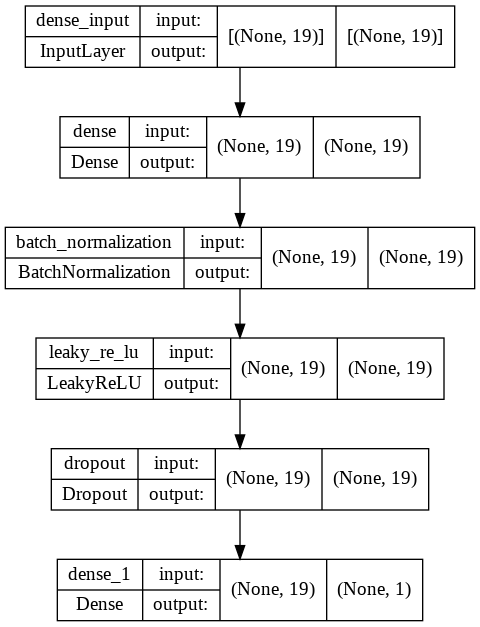

In [ ]:
tf.keras.utils.plot_model(baseline_deep, show_layer_names=True, show_shapes=True)

In [ ]:
mse_loss=tf.keras.losses.MeanSquaredError()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
baseline_deep.compile(optimizer=optimizer, loss=mse_loss, metrics=[tf.keras.metrics.MeanSquaredError())])

In [ ]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, min_delta=0.001)
history = baseline_deep.fit(X_train, y_train, batch_size =64,  epochs=100, verbose=0, callbacks=[callback_es])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_percentage_error,epoch
95,1.014223e+10,1.067944e+11,95
96,1.013231e+10,1.188576e+11,96
97,1.013680e+10,1.123523e+11,97
98,1.010706e+10,1.218365e+11,98
99,1.015150e+10,1.206531e+11,99


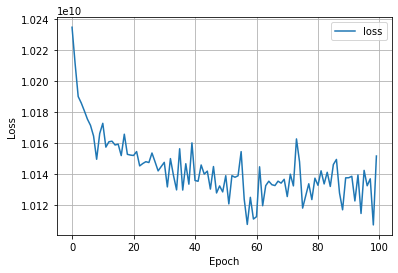

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [ ]:
## Now let's explore some topologies : width

In [ ]:
def deep_wide_model():
  model = Sequential()

  model.add(layers.Dense(256,input_shape=(19,), use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1,use_bias=False,activation="relu"))
  
  return model

In [ ]:
wide_deep = deep_wide_model()
wide_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               4864      
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 256       
                                                                 
Total params: 6,144
Trainable params: 5,632
Non-trainable params: 512
__________________________________________________

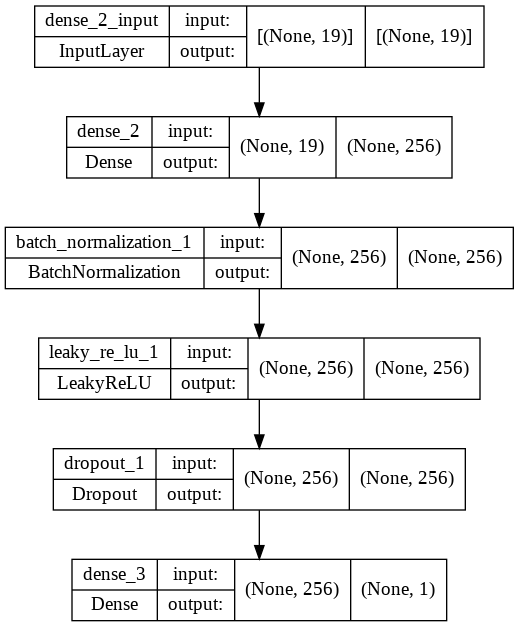

In [ ]:
tf.keras.utils.plot_model(wide_deep, show_layer_names=True, show_shapes=True)

In [ ]:
wide_deep.compile(optimizer=optimizer, loss=mse_loss, metrics=[tf.keras.metrics.MeanSquaredError()])
history_wide = wide_deep.fit(X_train, y_train, batch_size =64,  epochs=100, verbose=0, callbacks=[callback_es])

In [ ]:
hist = pd.DataFrame(history_wide.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_percentage_error,epoch
95,1.009427e+10,1.144882e+11,95
96,1.010436e+10,1.221260e+11,96
97,1.010810e+10,1.096188e+11,97
98,1.009087e+10,1.177880e+11,98
99,1.009249e+10,1.248076e+11,99


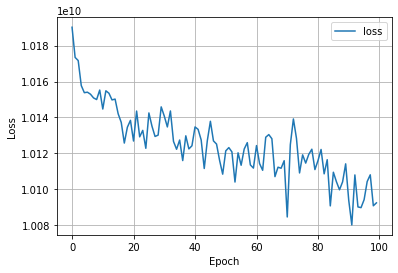

In [ ]:
plot_loss(history_wide)

In [ ]:
## Now let's explore some topologies : depth

In [ ]:
def deep_deep_model():
  model = Sequential()

  model.add(layers.Dense(38,input_shape=(19,), use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(19,input_shape=(19,), use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(10,input_shape=(19,), use_bias=False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1,use_bias=False,activation="relu"))
  
  return model

In [ ]:
deep_deep = deep_deep_model()
deep_deep.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 38)                722       
                                                                 
 batch_normalization_2 (Batc  (None, 38)               152       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 38)                0         
                                                                 
 dropout_2 (Dropout)         (None, 38)                0         
                                                                 
 dense_5 (Dense)             (None, 19)                722       
                                                                 
 batch_normalization_3 (Batc  (None, 19)               76        
 hNormalization)                                      

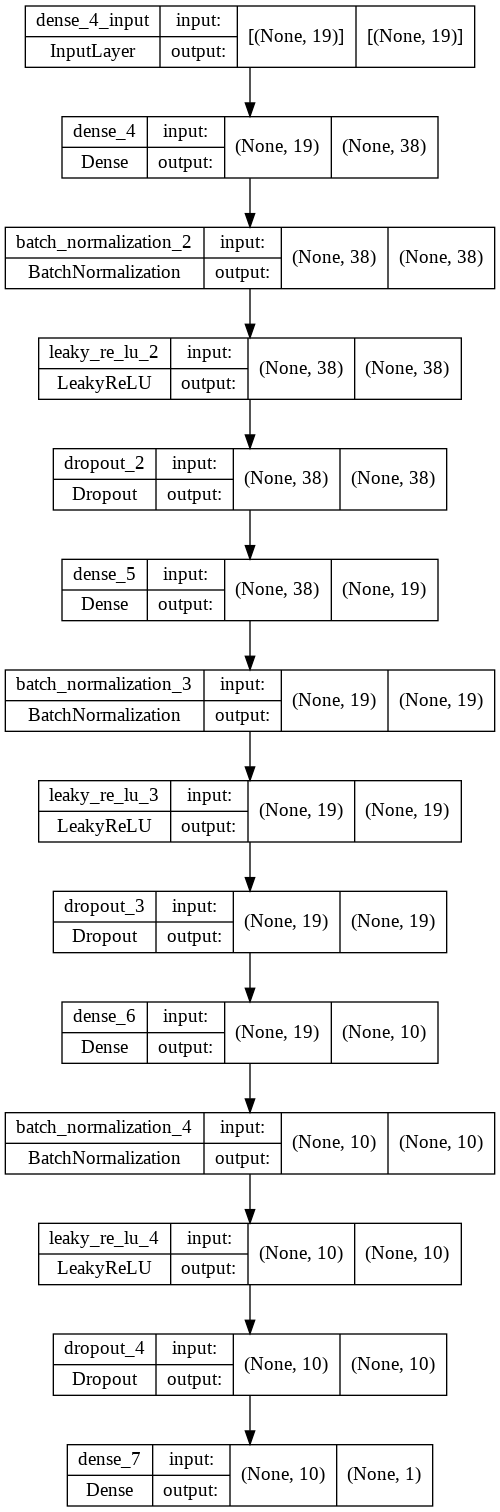

In [ ]:
tf.keras.utils.plot_model(deep_deep, show_layer_names=True, show_shapes=True)

In [ ]:
deep_deep.compile(optimizer=optimizer, loss=mse_loss, metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
history_deep = deep_deep.fit(X_train, y_train, batch_size =64,  epochs=100, verbose=0, callbacks=[callback_es])

In [ ]:
hist = pd.DataFrame(history_deep.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_percentage_error,epoch
95,1.013486e+10,1.038986e+11,95
96,1.009313e+10,9.063191e+10,96
97,1.009568e+10,9.244643e+10,97
98,1.016419e+10,7.734451e+10,98
99,1.010314e+10,8.410993e+10,99


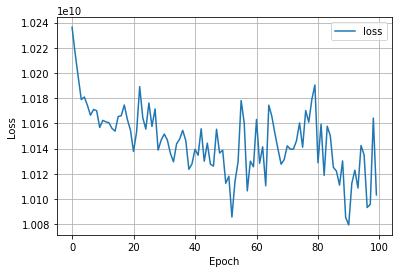

In [ ]:
plot_loss(history_deep)

In [ ]:
new_data.to_csv("drive/MyDrive/Capstone/model_data.csv")

In [ ]:
## Introduce LSTMs

In [ ]:
#check for stationarity and prepare dataset

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adfuller(new_data["new_value"], maxlag = 10)

(-149.1176937487481,
 0.0,
 10,
 500986,
 {'1%': -3.430363052926641,
  '10%': -2.5667730707556835,
  '5%': -2.861545769239962},
 13371249.384728724)

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 

In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 1:], train[:,0]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

In [ ]:
new_data.iloc[0:450_000,18:].sample(3)

,new_value,overall_sum,overall_mean,sum_lag_1,sum_lag_2,sum_lag_4,sum_lag_6,mean_lag_1,mean_lag_2,mean_lag_4,mean_lag_6
132180,0.711000,35697.863080,10.419692,27404.356763,23745.017993,27134.101654,27673.353395,10.149762,10.048675,10.570355,11.025240
367506,1.140000,54236.306212,10.689063,50656.682089,55504.646591,42209.996936,36853.289603,10.582135,10.560245,10.688781,11.280468
141475,0.152655,34861.474383,10.274528,35291.738970,36309.276304,27404.356763,14201.866820,11.228679,11.552426,10.149762,8.926378


In [ ]:
#divide to train and test
train = new_data.iloc[0:450_000,18:]
test = new_data.iloc[450_000:,18:]



In [ ]:
from re import X
# transform the scale of the data
train = train.values
test = test.values

scaler, train_scaled, y_scaleed = scale(train, test)

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

KeyboardInterrupt: ignored

In [ ]:
lstm_model.save("drive/MyDrive/Capstone/lstm_baseline")

In [ ]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(y_scaled)):
	# make one-step forecast
	X, y = y_scaled[i, 1:], test_scaled[i, 0]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions.append(yhat)

In [ ]:
confront_lstm = pd.DataFrame(pd.Series(predictions),pd.Series(y)).reset_index()